In [ ]:
import numpy as np
import torch

# Regressão Linear


In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split


SEED = 42
np.random.seed(SEED)


features, labels = fetch_california_housing(return_X_y=True)
features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size=0.25
)
features_train, features_validation, labels_train, labels_validation = train_test_split(
    features_train, labels_train, test_size=0.25
)

In [ ]:
features_validation.shape

(3870, 8)

# Regularização e seleção de modelo

# Classificação Tabular

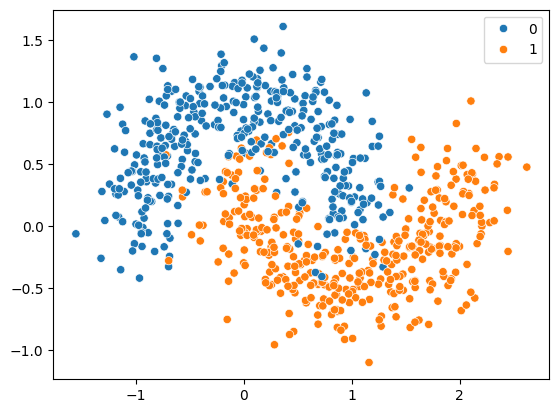

In [ ]:
from dataclasses import dataclass

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits, make_moons
from sklearn.model_selection import train_test_split

SEED = 42
np.random.seed(SEED)

@dataclass
class Dataset:
    features_train: np.ndarray
    features_test: np.ndarray
    labels_train: np.ndarray
    labels_test: np.ndarray

moon = Dataset(*train_test_split(
    *make_moons(n_samples=1000, shuffle=True, noise=0.25, random_state=SEED),
    random_state=SEED,
))

# Let's also plot the moon dataset, for you to take a look at it.
sns.scatterplot(
    x=moon.features_train[:, 0],
    y=moon.features_train[:, 1],
    hue=moon.labels_train,
)
plt.show()


Para facilitar sua vida: use PyTorch, Adam para otimizar (é uma variação SGD) com lr=0.001, use o banco de treino inteiro ao invés de minibatchces, use `binary_cross_entropy_with_logits` para implementar a -log verossimilhança, use `torch.autograd.functional` para calcular a Hessiana. Você pode usar as bibliotecas importadas na primeira célula à vontade. Verifique a documentação de `binary_cross_entropy_with_logits` para garantir que a sua priori está implementada corretamente, preservando as proporções devidas. Use 10000 amostras das aproximações para calcular suas predições.

In [ ]:
from sklearn.datasets import load_breast_cancer

data =  load_breast_cancer()
N = len(data.data)
Ntrain = int(np.ceil(N*0.6))
perm = np.random.permutation(len(data.data))
X = torch.tensor(data.data).float()
X = torch.cat((X, torch.ones((X.shape[0], 1))), axis=1)
y = torch.tensor(data.target).float()

Xtrain, ytrain = X[perm[:Ntrain]], y[perm[:Ntrain]]
Xtest, ytest = X[perm[Ntrain:]], y[perm[Ntrain:]]

# Classificação Imagens de MLP e CNN

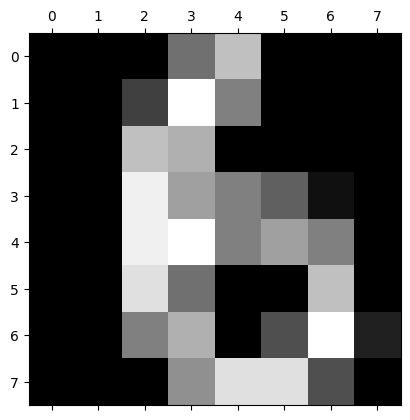

In [ ]:
# Import dataset and separate train/test subsets
mnist = Dataset(*train_test_split(
    *load_digits(return_X_y=True),
    random_state=SEED,
))

# Notice that, in the MNIST dataset, the images are already flattened, i.e., are
# represented as 64-dimensional vectors, not as 8 by 8 matrices.

# To plot one of them, you should reshape it back into (8, 8)
plt.matshow(mnist.features_test[0].reshape(8, 8))
plt.gray()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import seaborn as sns
import io
import base64

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import random_split, DataLoader
import tqdm

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

# The batch size
batch_size = 2048

transform_train = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

train_set = torchvision.datasets.CIFAR10(
    root="./data", train=True, download=True,
    transform=transform_train,
)
test_set = torchvision.datasets.CIFAR10(
    root="./data", train=False, download=True,
    transform=transform_test
)

train_loader = DataLoader(
    train_set, batch_size=batch_size, shuffle=True,
    num_workers=2
)
test_loader = DataLoader(
    test_set, batch_size=batch_size, shuffle=True,
    num_workers=2
)

classes = (
    'plane', 'car', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
)

n_img = 8

f, ax = plt.subplots(2, 4, figsize=(9,5))
dataiter = iter(test_loader)
images, labels = next(dataiter)

for i in range(n_img):
    npimg = images[i]/2 + 0.5
    npimg = npimg.numpy()
    ax[i%2,i//2].imshow(np.transpose(npimg, (1, 2, 0)))
    ax[i%2,i//2].set_title(classes[labels[i]])


cpu


NameError: name 'transforms' is not defined

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.LazyLinear(120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


cnn = CNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer_cnn = torch.optim.Adam(cnn.parameters(), lr=0.001)


for epoch in range(1):  # loop over the dataset multiple times
    running_loss = 0.0
    aux = 0
    for data in train_loader:
        if aux == 0 and epoch == 0:
            print('this is how to load a training batch')
        aux += 1


# Caso Final

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
from os import listdir
from os.path import isfile, join

Mounted at /content/gdrive


In [ ]:
path = f'./gdrive/MyDrive/Colab Notebooks/Desastres/multimodal/'
directories = listdir(path)
fires_dir, ok_dir = path + directories[3], path + directories[0]

print(fires_dir)
fire_txt = listdir(fires_dir + '/text/')

./gdrive/MyDrive/Colab Notebooks/Desastres/multimodal/fires


In [ ]:
fire_txt

[]